# Words filter

## Import libraries

In [1]:
import re
import time

## Validator function

In [2]:
def is_valid_word(word: str) -> bool:
    return re.match("^[a-z]+$", word)

## Parse dataset

In [3]:
valid_words = set()
dataset_filepath = "./datasets/words.txt"

parse_start_time = time.time()
total_words = 0
with open(dataset_filepath, 'r') as dataset:
    for word in dataset:
        total_words += 1
        unified_word = word.lower().rstrip('\n')
        if is_valid_word(unified_word):
            valid_words.add(unified_word)

sorted_words = sorted(valid_words)

parse_end_time = time.time()

print("Total words:", total_words)
print("Valid words:", len(valid_words))
print("Total time: ", round(parse_end_time - parse_start_time, 2), "s")

Total words: 466550
Valid words: 416292
Total time:  1.23 s


## Analizing data

In [4]:
import matplotlib.pyplot as plt

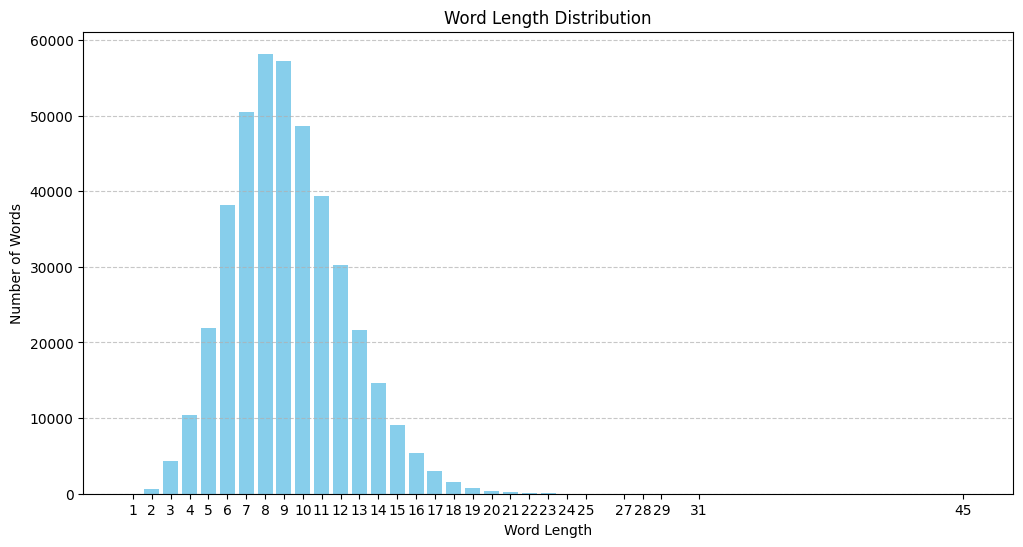

In [5]:
word_length_count = {}
for word in sorted_words:
    length = len(word)
    if length in word_length_count:
        word_length_count[length] += 1
    else:
        word_length_count[length] = 1

sorted_lengths = sorted(word_length_count.keys())
counts = [word_length_count[length] for length in sorted_lengths]

plt.figure(figsize=(12, 6))
plt.bar(sorted_lengths, counts, color='skyblue')
plt.xlabel('Word Length')
plt.ylabel('Number of Words')
plt.title('Word Length Distribution')
plt.xticks(sorted_lengths)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

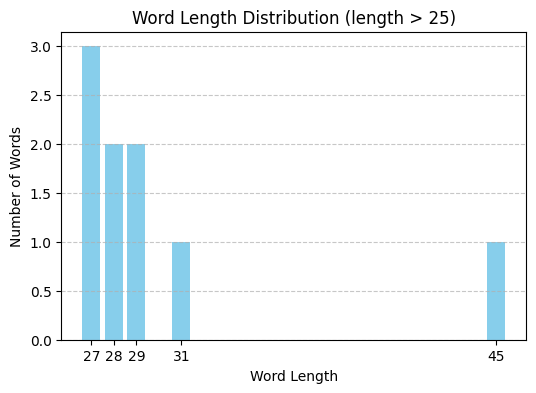

In [6]:
plt.figure(figsize=(6, 4))
plt.bar(sorted_lengths[25:], counts[25:], color='skyblue')
plt.xlabel('Word Length')
plt.ylabel('Number of Words')
plt.title('Word Length Distribution (length > 25)')
plt.xticks(sorted_lengths[25:])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [7]:
# Remove words with length > 25
sorted_words_removed_long = [word for word in sorted_words if len(word) <= 25]

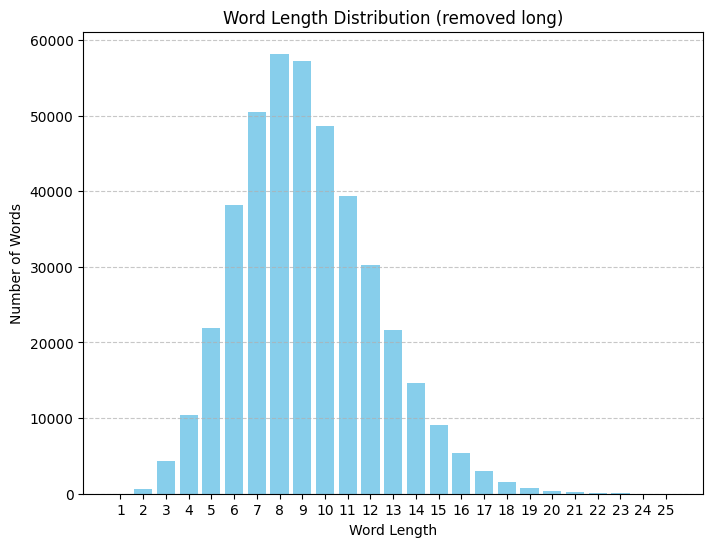

In [10]:
word_length_count_removed_long = {}
for word in sorted_words_removed_long:
    length = len(word)
    if length in word_length_count_removed_long:
        word_length_count_removed_long[length] += 1
    else:
        word_length_count_removed_long[length] = 1

sorted_lengths = sorted(word_length_count_removed_long.keys())
counts = [word_length_count_removed_long[length] for length in sorted_lengths]

plt.figure(figsize=(8, 6))
plt.bar(sorted_lengths, counts, color='skyblue')
plt.xlabel('Word Length')
plt.ylabel('Number of Words')
plt.title('Word Length Distribution (removed long)')
plt.xticks(sorted_lengths)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Export dataset

In [11]:
export_file_path = "./datasets/filtered_words.txt"

with open(export_file_path, "w") as file:
    for word in sorted_words_removed_long:
        file.write(word + "\n")

print("Done!")

Done!
